In [2]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# pd.concat([df1,df2])

### Example 1:

In [3]:
# Sample dataset of job postings in January
job_postings_jan = pd.DataFrame({
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E'],
    'job_posted_date': pd.to_datetime(['2024-01-02', '2024-01-07', '2024-01-14', '2024-01-19', '2024-01-24'])
})

job_postings_jan

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24


In [4]:
# Sample dataset of job postings in February
job_postings_feb = pd.DataFrame({
    'job_id': [6, 7, 8, 9, 10],
    'job_title': ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Scientist', 'Data Engineer'],
    'company': ['Company F', 'Company G', 'Company H', 'Company I', 'Company J'],
    'job_posted_date': pd.to_datetime(['2024-02-05', '2024-02-09', '2024-02-12', '2024-02-18', '2024-02-22'])
})

job_postings_feb

,job_id,job_title,company,job_posted_date
0,6,Data Scientist,Company F,2024-02-05
1,7,Data Analyst,Company G,2024-02-09
2,8,Machine Learning Engineer,Company H,2024-02-12
3,9,Data Scientist,Company I,2024-02-18
4,10,Data Engineer,Company J,2024-02-22


In [6]:
# If we were to merge,
job_postings_jan.merge(job_postings_feb, on='job_title', suffixes=('_jan','_feb'))

,job_id_jan,job_title,company_jan,job_posted_date_jan,job_id_feb,company_feb,job_posted_date_feb
0,1,Data Scientist,Company A,2024-01-02,6,Company F,2024-02-05
1,1,Data Scientist,Company A,2024-01-02,9,Company I,2024-02-18
2,2,Data Analyst,Company B,2024-01-07,7,Company G,2024-02-09
3,3,Machine Learning Engineer,Company C,2024-01-14,8,Company H,2024-02-12
4,4,Data Scientist,Company D,2024-01-19,6,Company F,2024-02-05
5,4,Data Scientist,Company D,2024-01-19,9,Company I,2024-02-18
6,5,Data Engineer,Company E,2024-01-24,10,Company J,2024-02-22


In [5]:
# Concatenate the two DataFrames
job_postings_combined = pd.concat([job_postings_jan, job_postings_feb], ignore_index=True)

job_postings_combined

,job_id,job_title,company,job_posted_date
0,1,Data Scientist,Company A,2024-01-02
1,2,Data Analyst,Company B,2024-01-07
2,3,Machine Learning Engineer,Company C,2024-01-14
3,4,Data Scientist,Company D,2024-01-19
4,5,Data Engineer,Company E,2024-01-24
5,6,Data Scientist,Company F,2024-02-05
6,7,Data Analyst,Company G,2024-02-09
7,8,Machine Learning Engineer,Company H,2024-02-12
8,9,Data Scientist,Company I,2024-02-18
9,10,Data Engineer,Company J,2024-02-22


### Example 2:

Right now, we have one df, but we will create multiple dfs in order to use the pd.concat(). We will start by breaking the df into individual dfs for each month. To do this, we will
   -  1st - Create a Column for each month
   -  2nd - Create a DataFrame for each month

In [17]:
# Create a column for each month so that we have a column where we can identfy each month by
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%b')
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",Aug


In [19]:
#Create dataframes for each month.

#we want to break the df into 12 df. The easiest way to do this is to store it in a dictionary like this

# dict_month = {
#     'jan': df_jan,
#     'feb': df_feb,
#     'mar': df_mar,
#     'apr': df_apr,
#     'may': df_may,
#     'jun': df_jun,
#     'jul': df_jul,
#     'aug': df_aug,
#     'sep': df_sep,
#     'oct': df_oct,
#     'nov': df_nov,
#     'dec': df_dec
# }

#we can make this with dict comprehension:

# the 1st thing we need to do is get this list of names of months
months = df['job_posted_month'].unique()

# building the dict comprehension: 

    #for loop : {month: month for month in months}
    #we want the df in it so: 

dict_months = {month: df[df['job_posted_month'] == month] for month in months}

# long way
# dict_months = {}
# for month in months:
#     dict_months[month] = df[df['job_posted_month'] == month]


In [12]:
 df['job_posted_month'].unique()

array(['Jun', 'Jan', 'Oct', 'Jul', 'Aug', 'Nov', 'Mar', 'Dec', 'Apr',
       'Feb', 'Sep', 'May'], dtype=object)

In [13]:
{month: month for month in months}

{'Jun': 'Jun',
 'Jan': 'Jan',
 'Oct': 'Oct',
 'Jul': 'Jul',
 'Aug': 'Aug',
 'Nov': 'Nov',
 'Mar': 'Mar',
 'Dec': 'Dec',
 'Apr': 'Apr',
 'Feb': 'Feb',
 'Sep': 'Sep',
 'May': 'May'}

In [14]:
{month: df[df['job_posted_month'] == month] for month in months}

{'Jun':                   job_title_short  \
 0            Senior Data Engineer   
 8                Business Analyst   
 16                  Data Engineer   
 17                 Data Scientist   
 24                 Data Scientist   
 ...                           ...   
 785347             Data Scientist   
 785571               Data Analyst   
 785617               Data Analyst   
 785669  Machine Learning Engineer   
 785675               Data Analyst   
 
                                                 job_title  \
 0       Senior Clinical Data Engineer / Principal Clin...   
 8                Technology & Operations Business Analyst   
 16                                      Big Data Engineer   
 17                                 Data Science Team Lead   
 24                          Data Scientist (DataLab Team)   
 ...                                                   ...   
 785347                    Practicante Científico de Datos   
 785571  Credits Monitoring and Reporti

In [20]:
type(dict_months)

dict

In [16]:
dict_months['Jan']

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
39,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
53,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785699,Software Engineer,Simulation Engineer,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:30,False,False,Czechia,None,NaN,NaN,Ricardo Prague s.r.o.,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Jan
785700,Data Engineer,Data Engineer Ssr/Sr,"Mexico City, CDMX, Mexico",via Trabajo.org,Full-time,False,Mexico,2023-01-12 06:19:55,True,False,Mexico,None,NaN,NaN,Tsoft,"['python', 'r', 'azure', 'aws', 'gcp', 'spark'...","{'cloud': ['azure', 'aws', 'gcp'], 'libraries'...",Jan
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
785704,Business Analyst,Business Analyst,"Prague, Czechia",via Trabajo.org,Full-time,False,Czechia,2023-01-16 06:35:20,False,False,Czechia,None,NaN,NaN,Cleverlance,None,None,Jan


## Using the Date from Ex:2 Boss needs 2023 Quater 1

In [23]:
#Concatenate the first quarter. Boss needs all the data from Q1 (Jan, Feb, Mar)
quarter_1 = [dict_months['Jan'], dict_months['Feb'], dict_months['Mar']]

df_q1 = pd.concat(quarter_1, ignore_index=True)

df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",Mar


In [25]:
#Or
df_q1 = pd.concat([dict_months['Jan'], dict_months['Feb'], dict_months['Mar']], ignore_index=True)

<Axes: xlabel='job_posted_month'>

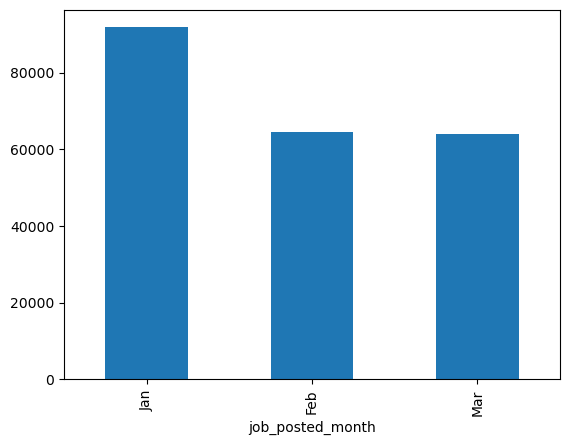

In [29]:
df_q1['job_posted_month'].value_counts().plot(kind='bar')

___

## Course Practice Problems

Concatenate two DataFrames to analyze job postings for Data Scientists and Data Analysts:

- Create one DataFrame with job postings for Data Scientists named data_scientist_df and another for Data Analysts named data_analyst_df.
- Concatenate them and display the combined DataFrame called combined_df.

(2.8.1)

    Use the pd.concat() function to concatenate the DataFrames.

In [30]:
data_scientist_df = df[df['job_title_short']== 'Data Scientist']

In [31]:
data_analyst_df = df[df['job_title_short']== 'Data Analyst']

In [41]:
combined_df = pd.concat([data_scientist_df,data_analyst_df], ignore_index=True)
combined_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'...",Apr
1,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"['go', 'apl', 'excel']","{'analyst_tools': ['excel'], 'programming': ['...",Jun
2,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"['r', 'sql', 'python', 'scala', 'java', 'c++',...","{'analyst_tools': ['tableau'], 'libraries': ['...",Apr
3,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",Jan
4,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368356,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,Jan
368357,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",Jan
368358,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,Mar
368359,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}",Mar


Concatenate DataFrames to analyze job postings by month:

- Create DataFrames for job postings for the last quarter (October, November, and December). These are respectively called oct_df, nov_df, and dec_df.
- Concatenate them and display the combined DataFrame named combined_df.

(2.8.2)

    Use the pd.concat() function to concatenate the DataFrames.

In [43]:
months = df['job_posted_month'].unique()
dict_months = {month: df[df['job_posted_month'] == month] for month in months}
combined_df =pd.concat([dict_months['Oct'], dict_months['Nov'], dict_months['Dec']], ignore_index=True)
combined_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
1,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",Oct
2,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",Oct
3,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},Oct
4,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"['sas', 'sas', 'r', 'python', 'vba', 'sql', 'j...","{'analyst_tools': ['sas', 'spss', 'tableau', '...",Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187359,Data Engineer,Data Engineer,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Fram^,"['sql', 'nosql', 'postgresql', 'mysql', 'spark...","{'databases': ['postgresql', 'mysql'], 'librar...",Dec
187360,Data Engineer,Data Engineer,"Gothenburg, Sweden",via Trabajo.org,Full-time,False,Sweden,2023-12-13 06:49:09,False,False,Sweden,None,NaN,NaN,Avigna AB,None,None,Dec
187361,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.","['sql', 'python', 'pyspark', 'excel', 'spreads...","{'analyst_tools': ['excel', 'spreadsheet'], 'l...",Dec
187362,Business Analyst,Business Analysis and Intelligence Manager,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-12-05 06:22:35,False,False,Malaysia,None,NaN,NaN,Denave (M) Sdn Bhd,"['sql', 'sql server', 'excel', 'word', 'power ...","{'analyst_tools': ['excel', 'word', 'power bi'...",Dec


In [35]:
#Alternative/Course Solution
oct_df = df[df['job_posted_date'].dt.month == 10]
nov_df = df[df['job_posted_date'].dt.month == 11]
dec_df = df[df['job_posted_date'].dt.month == 12]
combined_df = pd.concat([oct_df, nov_df, dec_df], ignore_index=True)
combined_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",Oct
1,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"['python', 'sql', 'power bi']","{'analyst_tools': ['power bi'], 'programming':...",Oct
2,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",Oct
3,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},Oct
4,Data Analyst,"Data Analyst (Bangkok Based, relocation provided)","Rome, Metropolitan City of Rome Capital, Italy",via LinkedIn,Full-time,False,Italy,2023-10-30 13:13:21,False,False,Italy,None,NaN,NaN,Agoda,"['sas', 'sas', 'r', 'python', 'vba', 'sql', 'j...","{'analyst_tools': ['sas', 'spss', 'tableau', '...",Oct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187359,Data Engineer,Data Engineer,"Ho Chi Minh City, Vietnam",via Trabajo.org,Full-time,False,Vietnam,2023-12-17 06:23:18,False,False,Vietnam,None,NaN,NaN,Fram^,"['sql', 'nosql', 'postgresql', 'mysql', 'spark...","{'databases': ['postgresql', 'mysql'], 'librar...",Dec
187360,Data Engineer,Data Engineer,"Gothenburg, Sweden",via Trabajo.org,Full-time,False,Sweden,2023-12-13 06:49:09,False,False,Sweden,None,NaN,NaN,Avigna AB,None,None,Dec
187361,Data Analyst,Data Analyst Lead,Thailand,via Trabajo.org,Full-time,False,Thailand,2023-12-17 06:16:04,False,False,Thailand,None,NaN,NaN,"Siam Piwat Co., Ltd.","['sql', 'python', 'pyspark', 'excel', 'spreads...","{'analyst_tools': ['excel', 'spreadsheet'], 'l...",Dec
187362,Business Analyst,Business Analysis and Intelligence Manager,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-12-05 06:22:35,False,False,Malaysia,None,NaN,NaN,Denave (M) Sdn Bhd,"['sql', 'sql server', 'excel', 'word', 'power ...","{'analyst_tools': ['excel', 'word', 'power bi'...",Dec


Concatenate DataFrames to analyze job postings for different job types:

- Create DataFrames for 'Full-time' roles (called full_time_df) and 'Part-time' roles (called part_time_df) job postings.
- Concatenate them and display the combined DataFrame named combined_df.

(2.8.3)

    Use the pd.concat() function to concatenate the DataFrames.

In [39]:
full_time_df = df[df['job_schedule_type']== 'Full-time']

In [40]:
part_time_df = df[df['job_schedule_type']== 'Part-time']

In [1]:
combined_df = pd.concat([full_time_df,part_time_df], ignore_index=True)
combined_df

NameError: name 'pd' is not defined